<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_02/03_Image_Classification_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Required Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import wandb
from wandb.integration.keras import WandbCallback

In [3]:
# 🔗 Initialize Weights & Biases
wandb.init(project="cifar10-image-classification", entity="rutujabhaskarrao-patil-san-jose-state-university")

In [4]:
# 📥 Load and Preprocess CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [5]:
# 🧠 Build CNN Model using Functional API
inputs = keras.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [6]:
# 🛠️ Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 📈 Train Model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[WandbCallback(save_graph=False, save_model=False)]
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2942 - loss: 1.9143 - val_accuracy: 0.5384 - val_loss: 1.3255
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5051 - loss: 1.3891 - val_accuracy: 0.6132 - val_loss: 1.0967
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5811 - loss: 1.1878 - val_accuracy: 0.6512 - val_loss: 1.0025
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6289 - loss: 1.0499 - val_accuracy: 0.6795 - val_loss: 0.9101
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6704 - loss: 0.9517 - val_accuracy: 0.6555 - val_loss: 0.9836
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6937 - loss: 0.8762 - val_accuracy: 0.7051 - val_loss: 0.8429
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7198 - loss: 0.7972 - val_accuracy: 0.7175 - val_loss: 0.8154
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7429 - loss: 0.7339 - val_accuracy: 0.

In [7]:
# 📊 Evaluate Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7263 - loss: 0.8356

Test Accuracy: 0.7255


In [8]:
# 📌 Predict on Test Set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


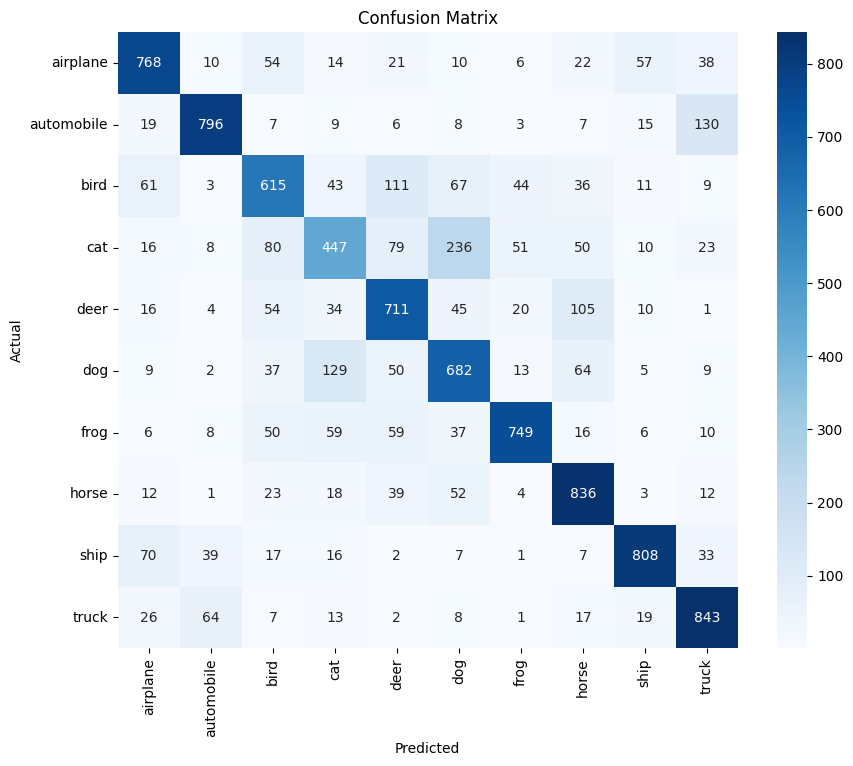

In [9]:
# 📉 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [10]:
# 🧾 Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

    airplane       0.77      0.77      0.77      1000
  automobile       0.85      0.80      0.82      1000
        bird       0.65      0.61      0.63      1000
         cat       0.57      0.45      0.50      1000
        deer       0.66      0.71      0.68      1000
         dog       0.59      0.68      0.63      1000
        frog       0.84      0.75      0.79      1000
       horse       0.72      0.84      0.77      1000
        ship       0.86      0.81      0.83      1000
       truck       0.76      0.84      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000



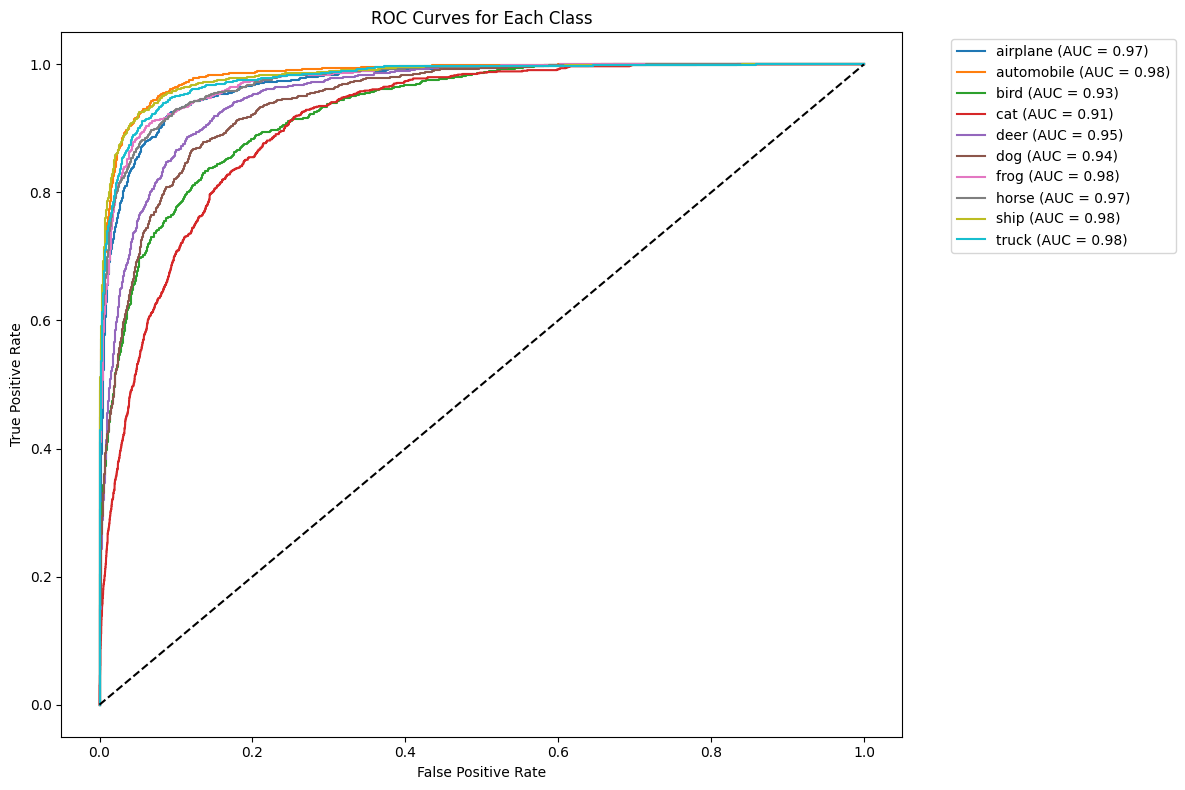

In [11]:
# 📈 Plot ROC Curve for Each Class
plt.figure(figsize=(12, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Each Class")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

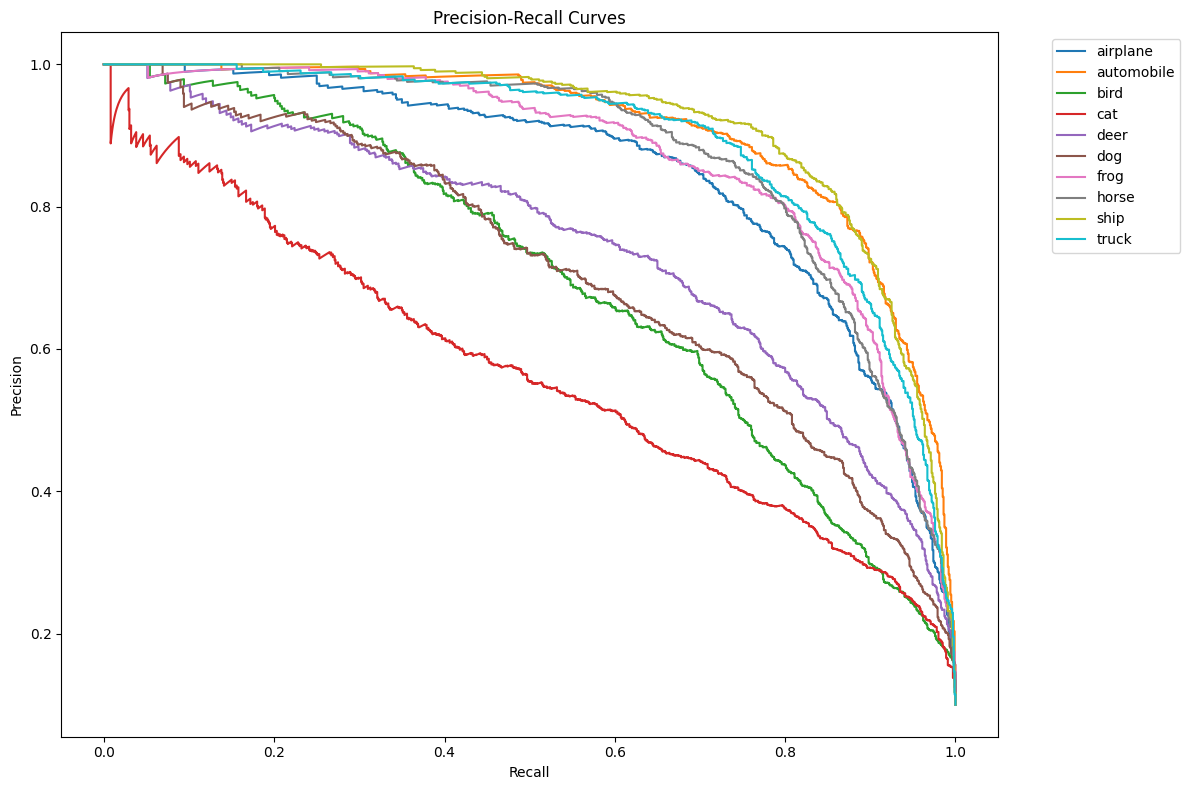

In [12]:
# 📉 Precision-Recall Curve
plt.figure(figsize=(12, 8))
for i in range(10):
    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), y_pred_probs[:, i])
    plt.plot(recall, precision, label=f"{class_names[i]}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

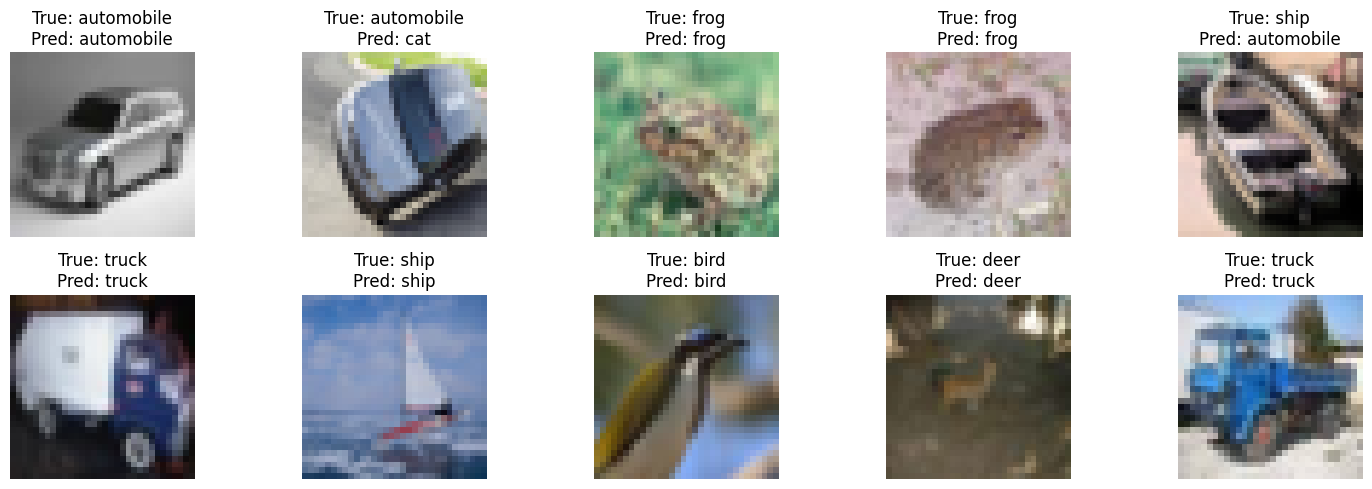

In [13]:
# 🖼️ Sample Predictions
plt.figure(figsize=(15, 5))
for i in range(10):
    idx = np.random.randint(0, len(x_test))
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


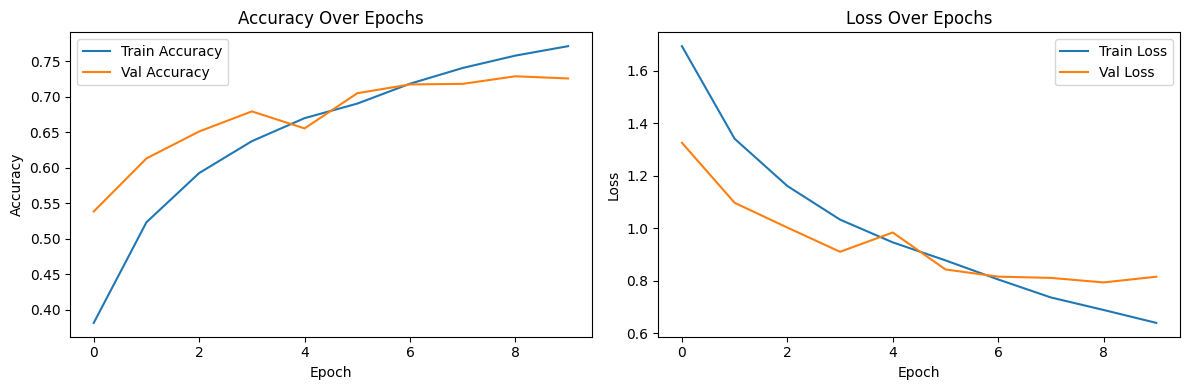

In [15]:
# 📉 Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
# 🧠 Model Summary
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,429,728 (13.08 MB)

 Trainable params: 1,143,242 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,286,486 (8.72 MB)

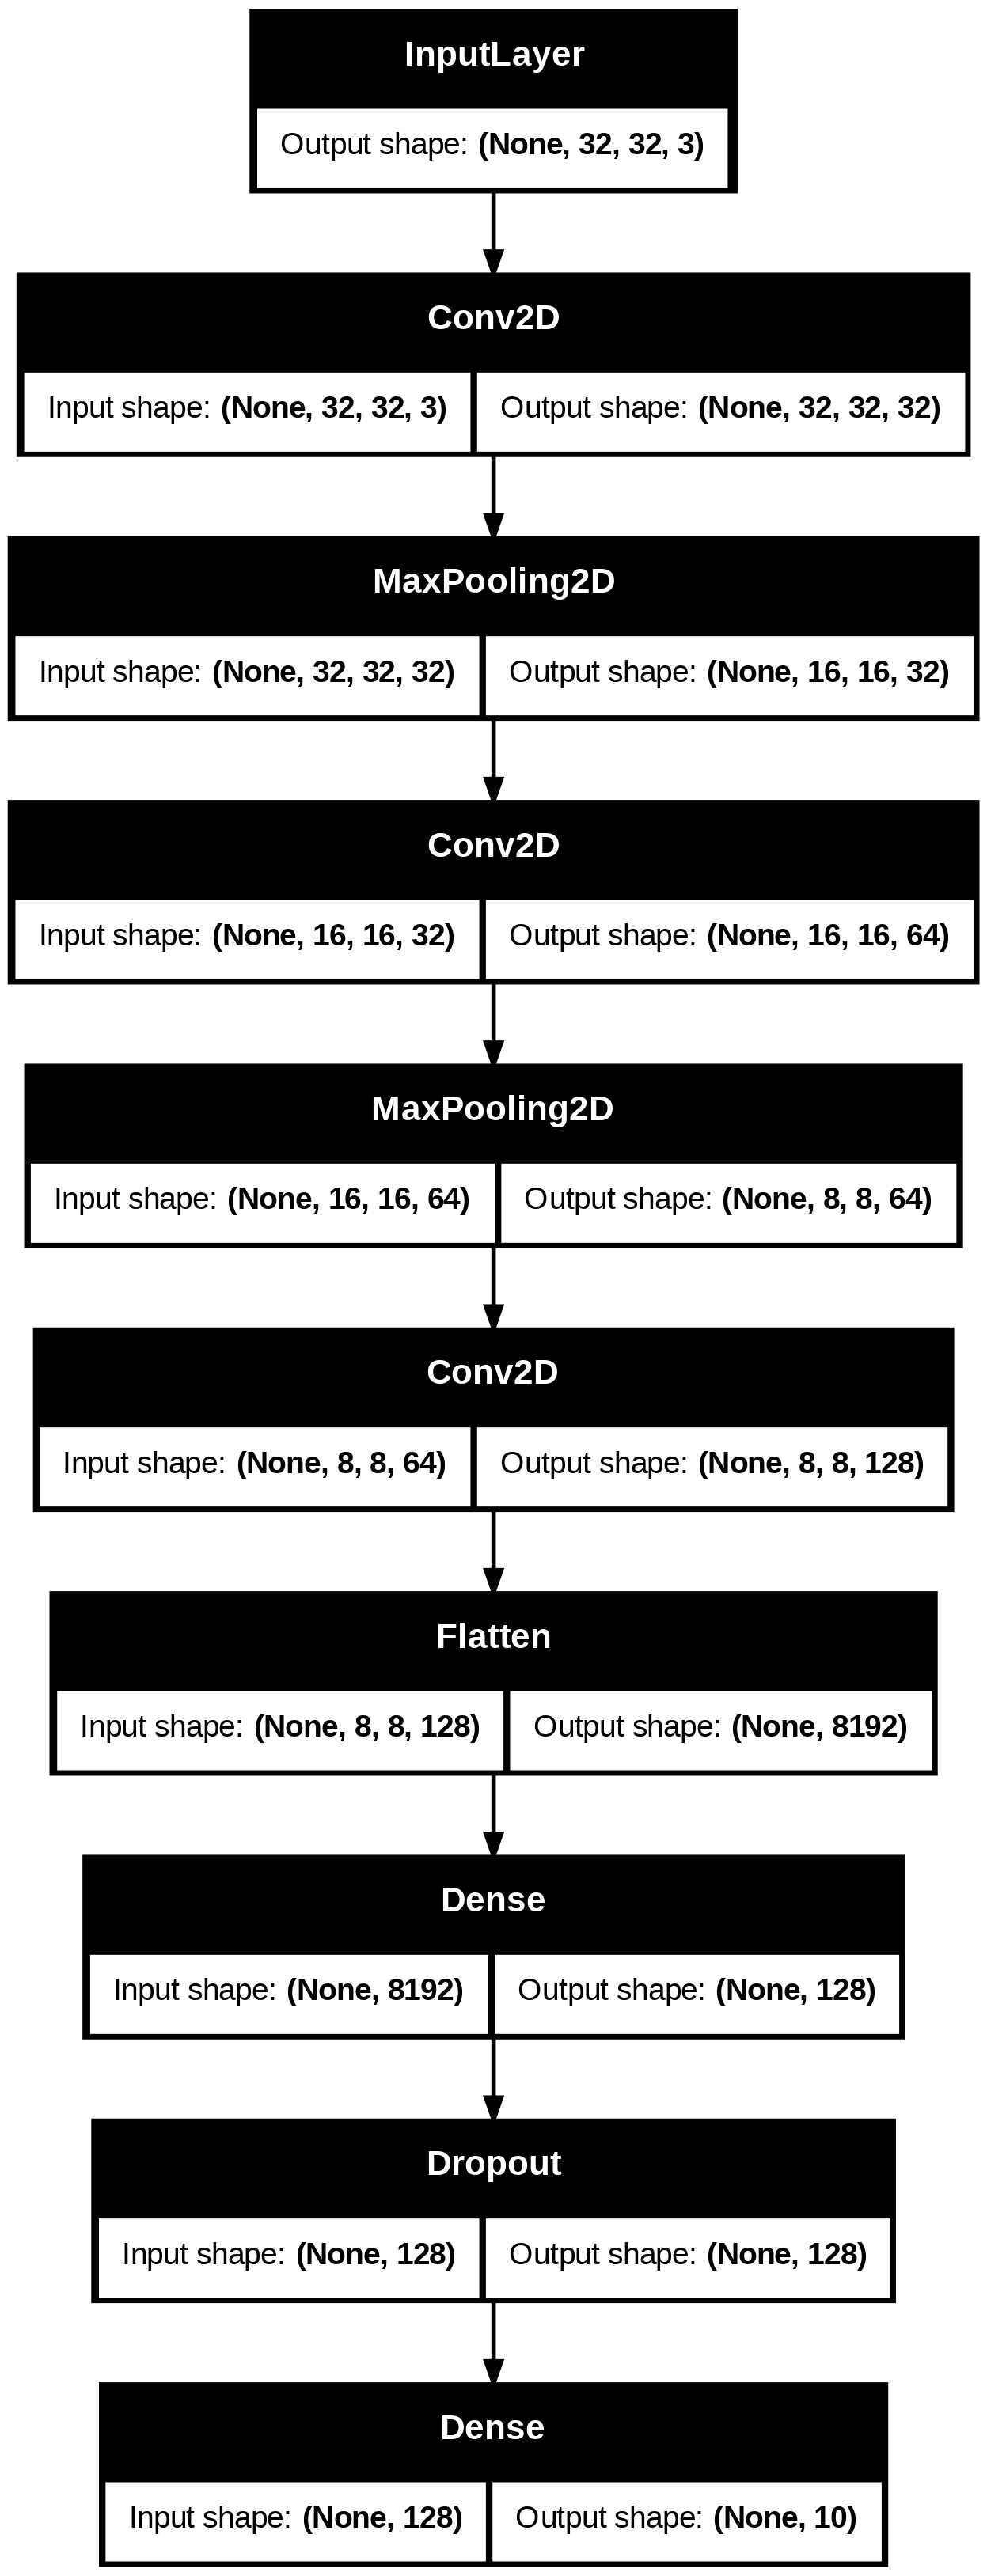

In [17]:
# 🖼️ Model Architecture Diagram
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display
plot_model(model, to_file="cnn_model.png", show_shapes=True)
display(Image("cnn_model.png"))

In [18]:
# Finish WandB Run
wandb.finish()

accuracy,▁▄▅▅▆▇▇▇██▁▃▅▅▆▆▇▇██
epoch,▁▂▃▃▄▅▆▆▇█▁▂▃▃▄▅▆▆▇█
loss,█▆▅▄▃▃▂▂▁▁█▆▅▄▃▃▂▂▁▁
val_accuracy,▁▄▆▆▇▇████▂▄▆▆▆▇████
val_loss,█▄▃▂▂▂▁▁▁▂▇▄▃▂▃▂▁▁▁▁
accuracy,0.77143
best_epoch,7
best_val_loss,0.77907
epoch,9
loss,0.63922
val_accuracy,0.7259
